# Problem Statement: Life Insurance Data

## The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high  performing agents and upskill programs for low performing agents.

### Step -1 . Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_excel("Sales.xlsx", sheet_name='Sales')
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.shape

(4520, 20)

In [5]:
print("Data has ", df.shape[0]," rows and  ",df.shape[1]," columns ")

Data has  4520  rows and   20  columns 


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.0,NaN,NaN,NaN,7002259.5,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

Correcting Messy Column names

In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

# Addition of new variables (if required)

### Since we have Column AgentBonus and No of Policies taken by any Customer, so it would NOT be fare , if we consider Agent Bonus for all Agents, as Bonus Should be calculated Average each policy and then Consider Agent Bonus

## 1.  So lets create additional Field, "AgentBonus_Per_Policy", which should be calculated by

### AgentBonus_Per_Policy = AgentBonus/NumberOfPolicy

## 2. Also lets create a new field called SumAssured_Per_Policy, which should be calculated by 


### SumAssured_Per_Policy = SumAssured/NumberOfPolicy



In [9]:
df2=df.copy()

In [10]:
df2['AgentBonus_Per_Policy']=df2['AgentBonus']/df2['NumberOfPolicy']

In [11]:
df2['SumAssured_Per_Policy']=df2['SumAssured']/df2['NumberOfPolicy']

In [12]:
df2.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore', 'AgentBonus_Per_Policy',
       'SumAssured_Per_Policy'],
      dtype='object')

In [13]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [14]:
#Checking Null Value
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                      269
CustTenure               226
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy            45
MaritalStatus              0
MonthlyIncome            236
Complaint                  0
ExistingPolicyTenure     184
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore             52
AgentBonus_Per_Policy     45
SumAssured_Per_Policy    199
dtype: int64

Table have NULL values in the many field, which needs to be impoted.

In [15]:
df2.isnull().sum().sum()

1410

In [16]:
df2.size

99440

#### 1410 is the total Null counts, which includes NULL counts for our 2 newly created fields as well, which are :
AgentBonus_Per_Policy     45
SumAssured_Per_Policy    199

#### If we subtract this count, then actual total number of missing values count is 1166


### NULL Treatment one by one for each NULL field

In [17]:
df2.Age.isnull().sum()

269

In [18]:
df2.Age = np.where( df2.Age.isnull(), df2.CustTenure, df2.Age)
df2.Age = np.where( df2.Age.isnull(), df2.ExistingPolicyTenure , df2.Age)

### Similarly if Cust tenure is NULL, replace it with existing Policy Tenure or Customer Age 

In [19]:
df2.CustTenure.isnull()

0       False
1       False
2       False
3        True
4        True
        ...  
4515    False
4516    False
4517    False
4518    False
4519    False
Name: CustTenure, Length: 4520, dtype: bool

In [20]:
df2.CustTenure.isnull().sum()

226

In [21]:
df2.CustTenure = np.where( df2.CustTenure.isnull(), df2.ExistingPolicyTenure , df2.CustTenure)
df2.CustTenure = np.where( df2.CustTenure.isnull(), df2.Age, df2.CustTenure)

In [22]:
df2.CustTenure.isnull().sum()

0

### Similarly if Cust Existing Policy tenure is NULL, replace it with Customer Tenure or Customer Age 

In [23]:
df2.ExistingPolicyTenure.isnull().sum()

184

In [24]:
df2.ExistingPolicyTenure = np.where( df2.ExistingPolicyTenure.isnull(), df2.CustTenure , df2.ExistingPolicyTenure)
df2.ExistingPolicyTenure = np.where( df2.ExistingPolicyTenure.isnull(), df2.Age, df2.ExistingPolicyTenure)

In [25]:
df2.ExistingPolicyTenure.isnull().sum()

0

### Treating NULL  for Number of Policies 
### Best way to Treat this field is to replace NULL with Mode

In [26]:
df2.NumberOfPolicy.isnull().sum()

45

In [27]:
mode = df2.NumberOfPolicy.mode()[0]
df2.NumberOfPolicy = df2.NumberOfPolicy.fillna(mode)

In [28]:
df2.NumberOfPolicy.isnull().sum()

0

### Treating NULLs for "AgentBonus_Per_Policy"

In [29]:
df2['AgentBonus_Per_Policy']=df2['AgentBonus']/df2['NumberOfPolicy']

In [30]:
df2.AgentBonus_Per_Policy.isnull().sum()

0

### Treating NULL  for "MonthlyIncome" and "SumAssured"
### Best way to Treat this field is to use KNN Imputers for missing NULL values

In [31]:
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                        0
CustTenure                 0
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy             0
MaritalStatus              0
MonthlyIncome            236
Complaint                  0
ExistingPolicyTenure       0
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore             52
AgentBonus_Per_Policy      0
SumAssured_Per_Policy    199
dtype: int64

In [32]:
from sklearn.impute import KNNImputer

In [33]:
imputer = KNNImputer(n_neighbors=10)

In [34]:
df_temp = df2[["MonthlyIncome","SumAssured_Per_Policy"]]

In [35]:
df_temp = pd.DataFrame(imputer.fit_transform(df_temp), columns = df_temp.columns)

In [36]:
df2[["MonthlyIncome","SumAssured_Per_Policy"]]=df_temp

In [37]:
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                        0
CustTenure                 0
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy             0
MaritalStatus              0
MonthlyIncome              0
Complaint                  0
ExistingPolicyTenure       0
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore             52
AgentBonus_Per_Policy      0
SumAssured_Per_Policy      0
dtype: int64

### Treating NULL  for  "CustCareScore" is to use Median for this value

In [38]:
df2.CustCareScore.isnull().sum()

52

In [39]:
df2.CustCareScore.fillna(int(df2.CustCareScore.median()), inplace=True)

In [40]:
df2.CustCareScore.isnull().sum()

0

In [41]:
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                        0
CustTenure                 0
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy             0
MaritalStatus              0
MonthlyIncome              0
Complaint                  0
ExistingPolicyTenure       0
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore              0
AgentBonus_Per_Policy      0
SumAssured_Per_Policy      0
dtype: int64

### We have treated all NULL values except SumAssured and Since we dont need this column, as we have already created SumAssured_per_policy and treated it's NULL, so we can ignore this column SumAssured and we will drop this in further steps

### Check for the Duplicate Customer IDs in Sample data

In [42]:
df2.CustID.duplicated().sum()

0

# Remove not necessary Columns

#### Since We have used AgentBonus and SumAssured for building our new field, so we dont need them any more for our analysis, 
#### Also We dont need field CustId for our analysis

In [43]:
df2.drop('CustID',axis=1 , inplace=True)
df2.drop('AgentBonus',axis=1 , inplace=True)
df2.drop('SumAssured',axis=1 , inplace=True)

### Also check co-relation matrix for all the fields and based on affect, we can take more actions:
    

In [44]:
df2.corr().T

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,LastMonthCalls,CustCareScore,AgentBonus_Per_Policy,SumAssured_Per_Policy
Age,1.000000,0.359631,0.076609,0.053143,0.347944,0.019496,0.263640,0.123837,0.029853,0.211933,0.197146
CustTenure,0.359631,1.000000,0.115561,0.066859,0.368525,0.006850,0.347473,0.142982,0.013919,0.207415,0.193545
ExistingProdType,0.076609,0.115561,1.000000,0.149862,0.191194,-0.003486,0.009800,0.033191,0.004110,-0.085003,-0.072151
NumberOfPolicy,0.053143,0.066859,0.149862,1.000000,0.128329,-0.016014,0.021839,0.075138,-0.001005,-0.733911,-0.683045
MonthlyIncome,0.347944,0.368525,0.191194,0.128329,1.000000,-0.004815,0.410641,0.343932,0.035751,0.163632,0.154270
Complaint,0.019496,0.006850,-0.003486,-0.016014,-0.004815,1.000000,-0.005082,-0.026320,-0.003814,0.025091,0.023838
ExistingPolicyTenure,0.263640,0.347473,0.009800,0.021839,0.410641,-0.005082,1.000000,0.126951,0.013532,0.188274,0.185564
LastMonthCalls,0.123837,0.142982,0.033191,0.075138,0.343932,-0.026320,0.126951,1.000000,0.006386,0.038717,0.034740
CustCareScore,0.029853,0.013919,0.004110,-0.001005,0.035751,-0.003814,0.013532,0.006386,1.000000,-0.005319,-0.013488
AgentBonus_Per_Policy,0.211933,0.207415,-0.085003,-0.733911,0.163632,0.025091,0.188274,0.038717,-0.005319,1.000000,0.937796


### CustCareScore, LastMonthCalls and Compaint dont have any relation with any other field, its almost 0 co-relation with every other field.and its good to drop those fields.

In [45]:
df2.drop('CustCareScore',axis=1 , inplace=True)
df2.drop('LastMonthCalls',axis=1 , inplace=True)
df2.drop('Complaint',axis=1 , inplace=True)

### Outlier removal (if applicable)

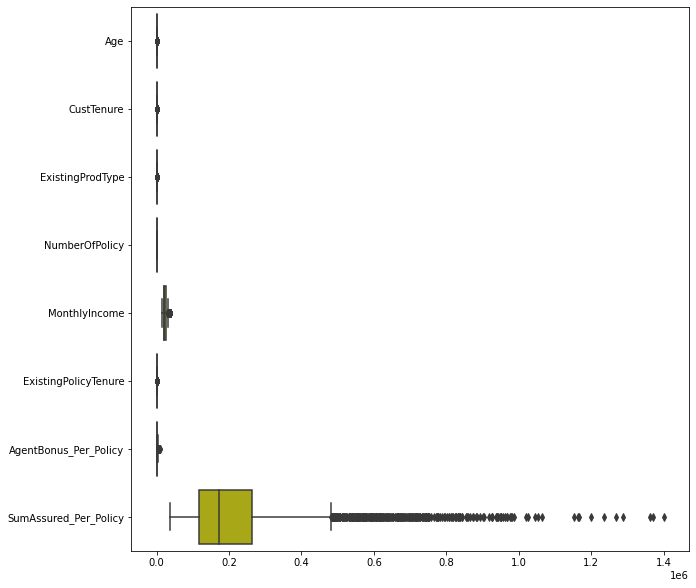

In [45]:
plt.figure(figsize=(10,10))
ax_box=sns.boxplot(data=df2, color='y', orient='h')


# Univariate Analysis

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4520 non-null   float64
 1   CustTenure             4520 non-null   float64
 2   Channel                4520 non-null   object 
 3   Occupation             4520 non-null   object 
 4   EducationField         4520 non-null   object 
 5   Gender                 4520 non-null   object 
 6   ExistingProdType       4520 non-null   int64  
 7   Designation            4520 non-null   object 
 8   NumberOfPolicy         4520 non-null   float64
 9   MaritalStatus          4520 non-null   object 
 10  MonthlyIncome          4520 non-null   float64
 11  ExistingPolicyTenure   4520 non-null   float64
 12  Zone                   4520 non-null   object 
 13  PaymentMethod          4520 non-null   object 
 14  AgentBonus_Per_Policy  4520 non-null   float64
 15  SumA

### Convert "MonthlyIncome" , "SumAssured" to Numeric Format

In [47]:
df2['MonthlyIncome'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4515    26355.0
4516    20991.0
4517    22892.6
4518    20068.0
4519    23820.0
Name: MonthlyIncome, Length: 4520, dtype: float64>

In [48]:
df2['MonthlyIncome'] = df2['MonthlyIncome'].astype(int)

In [49]:
df2['SumAssured_Per_Policy'] = df2['SumAssured_Per_Policy'].astype(int)

### Taking counts for each Categorical fields 

In [50]:
#Finding unique values for categorical variables
for column in df2.columns:
    if df2[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n\n')
        

Field name is  CHANNEL : and Count for this categories are  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64



Field name is  OCCUPATION : and Count for this categories are  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64



Field name is  EDUCATIONFIELD : and Count for this categories are  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64



Field name is  GENDER : and Count for this categories are  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64



Field name is  DESIGNATION : and Count for this categories are  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager         

### Merge similar categoriccal values as mentioned above in Insights 

In [51]:
print(df2.EducationField.value_counts())
print(df2.Gender.value_counts())
print(df2.Occupation.value_counts())
print(df2.Designation.value_counts())

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64
Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64


In [52]:
df2.EducationField = np.where(df2.EducationField=="UG","Under Graduate",df2.EducationField)
df2.Gender = np.where(df2.Gender=="Fe male","Female",df2.Gender)
df2.Occupation = np.where(df2.Occupation=="Laarge Business","Large Business",df2.Occupation)
df2.Designation = np.where(df2.Designation=="Exe","Executive",df2.Designation)

In [53]:
#Finding unique values for categorical variables
for column in df2.columns:
    if df2[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n\n')

Field name is  CHANNEL : and Count for this categories are  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64



Field name is  OCCUPATION : and Count for this categories are  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64



Field name is  EDUCATIONFIELD : and Count for this categories are  6
MBA                 74
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64



Field name is  GENDER : and Count for this categories are  2
Female    1832
Male      2688
Name: Gender, dtype: int64



Field name is  DESIGNATION : and Count for this categories are  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64



Field name is  MARITALSTATUS : and Count for this 

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')


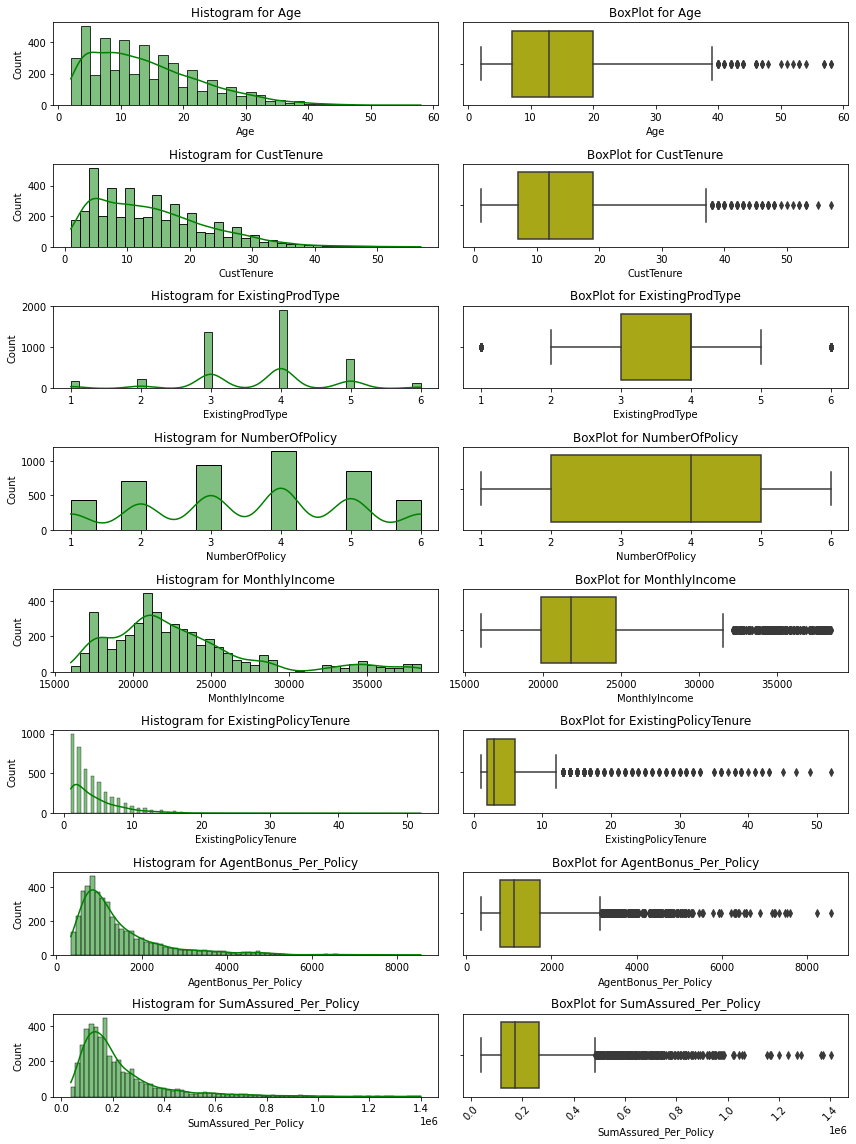

In [54]:
col_list=df2.columns
print(col_list)

fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(12,16)
x=0
y=0
for i in df2.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df2[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df2[i], data=df2, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [55]:
##Check for Skewness of the data:
df2.skew()

Age                      0.960101
CustTenure               0.928995
ExistingProdType        -0.401100
NumberOfPolicy          -0.108161
MonthlyIncome            1.373508
ExistingPolicyTenure     3.440053
AgentBonus_Per_Policy    2.144651
SumAssured_Per_Policy    2.373659
dtype: float64

## Bivariate Analysis

#### Biveriate analysis of all other fields, with repect to Agent Bonus, and take Mean, Counts and Sum of Categorical fields

In [54]:
#Finding unique values for categorical variables
for column in df2.select_dtypes(include='object'):
    print("Field name is ", column.upper(),': and Distinct Count for this Column is ',df2[column].nunique())
    print("Field name is ", column.upper(),': and it\'s distinct  categories are ',df2[column].unique(), end='\n')
    print('Counts are each categories of this column are : \n',df2[column].value_counts().sort_values(),end='\n\n')
    print('Average AgentBonus for each categories of this Column are: ',df2.groupby(column)['AgentBonus_Per_Policy'].mean('AgentBonus_Per_Policy').sort_values(),end='\n\n')
    print('Total sum value of AgentBonus for each category for Column are : ',df2.groupby(column)['AgentBonus_Per_Policy'].sum('AgentBonus_Per_Policy').sort_values(),end='\n\n')
    print('\n\n')

Field name is  CHANNEL : and Distinct Count for this Column is  3
Field name is  CHANNEL : and it's distinct  categories are  ['Agent' 'Third Party Partner' 'Online']
Counts are each categories of this column are : 
 Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64

Average AgentBonus for each categories of this Column are:  Channel
Third Party Partner    1419.576690
Agent                  1453.390106
Online                 1456.468768
Name: AgentBonus_Per_Policy, dtype: float64

Total sum value of AgentBonus for each category for Column are :  Channel
Online                 6.816274e+05
Third Party Partner    1.217997e+06
Agent                  4.642128e+06
Name: AgentBonus_Per_Policy, dtype: float64




Field name is  OCCUPATION : and Distinct Count for this Column is  4
Field name is  OCCUPATION : and it's distinct  categories are  ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Counts are each categories of

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')


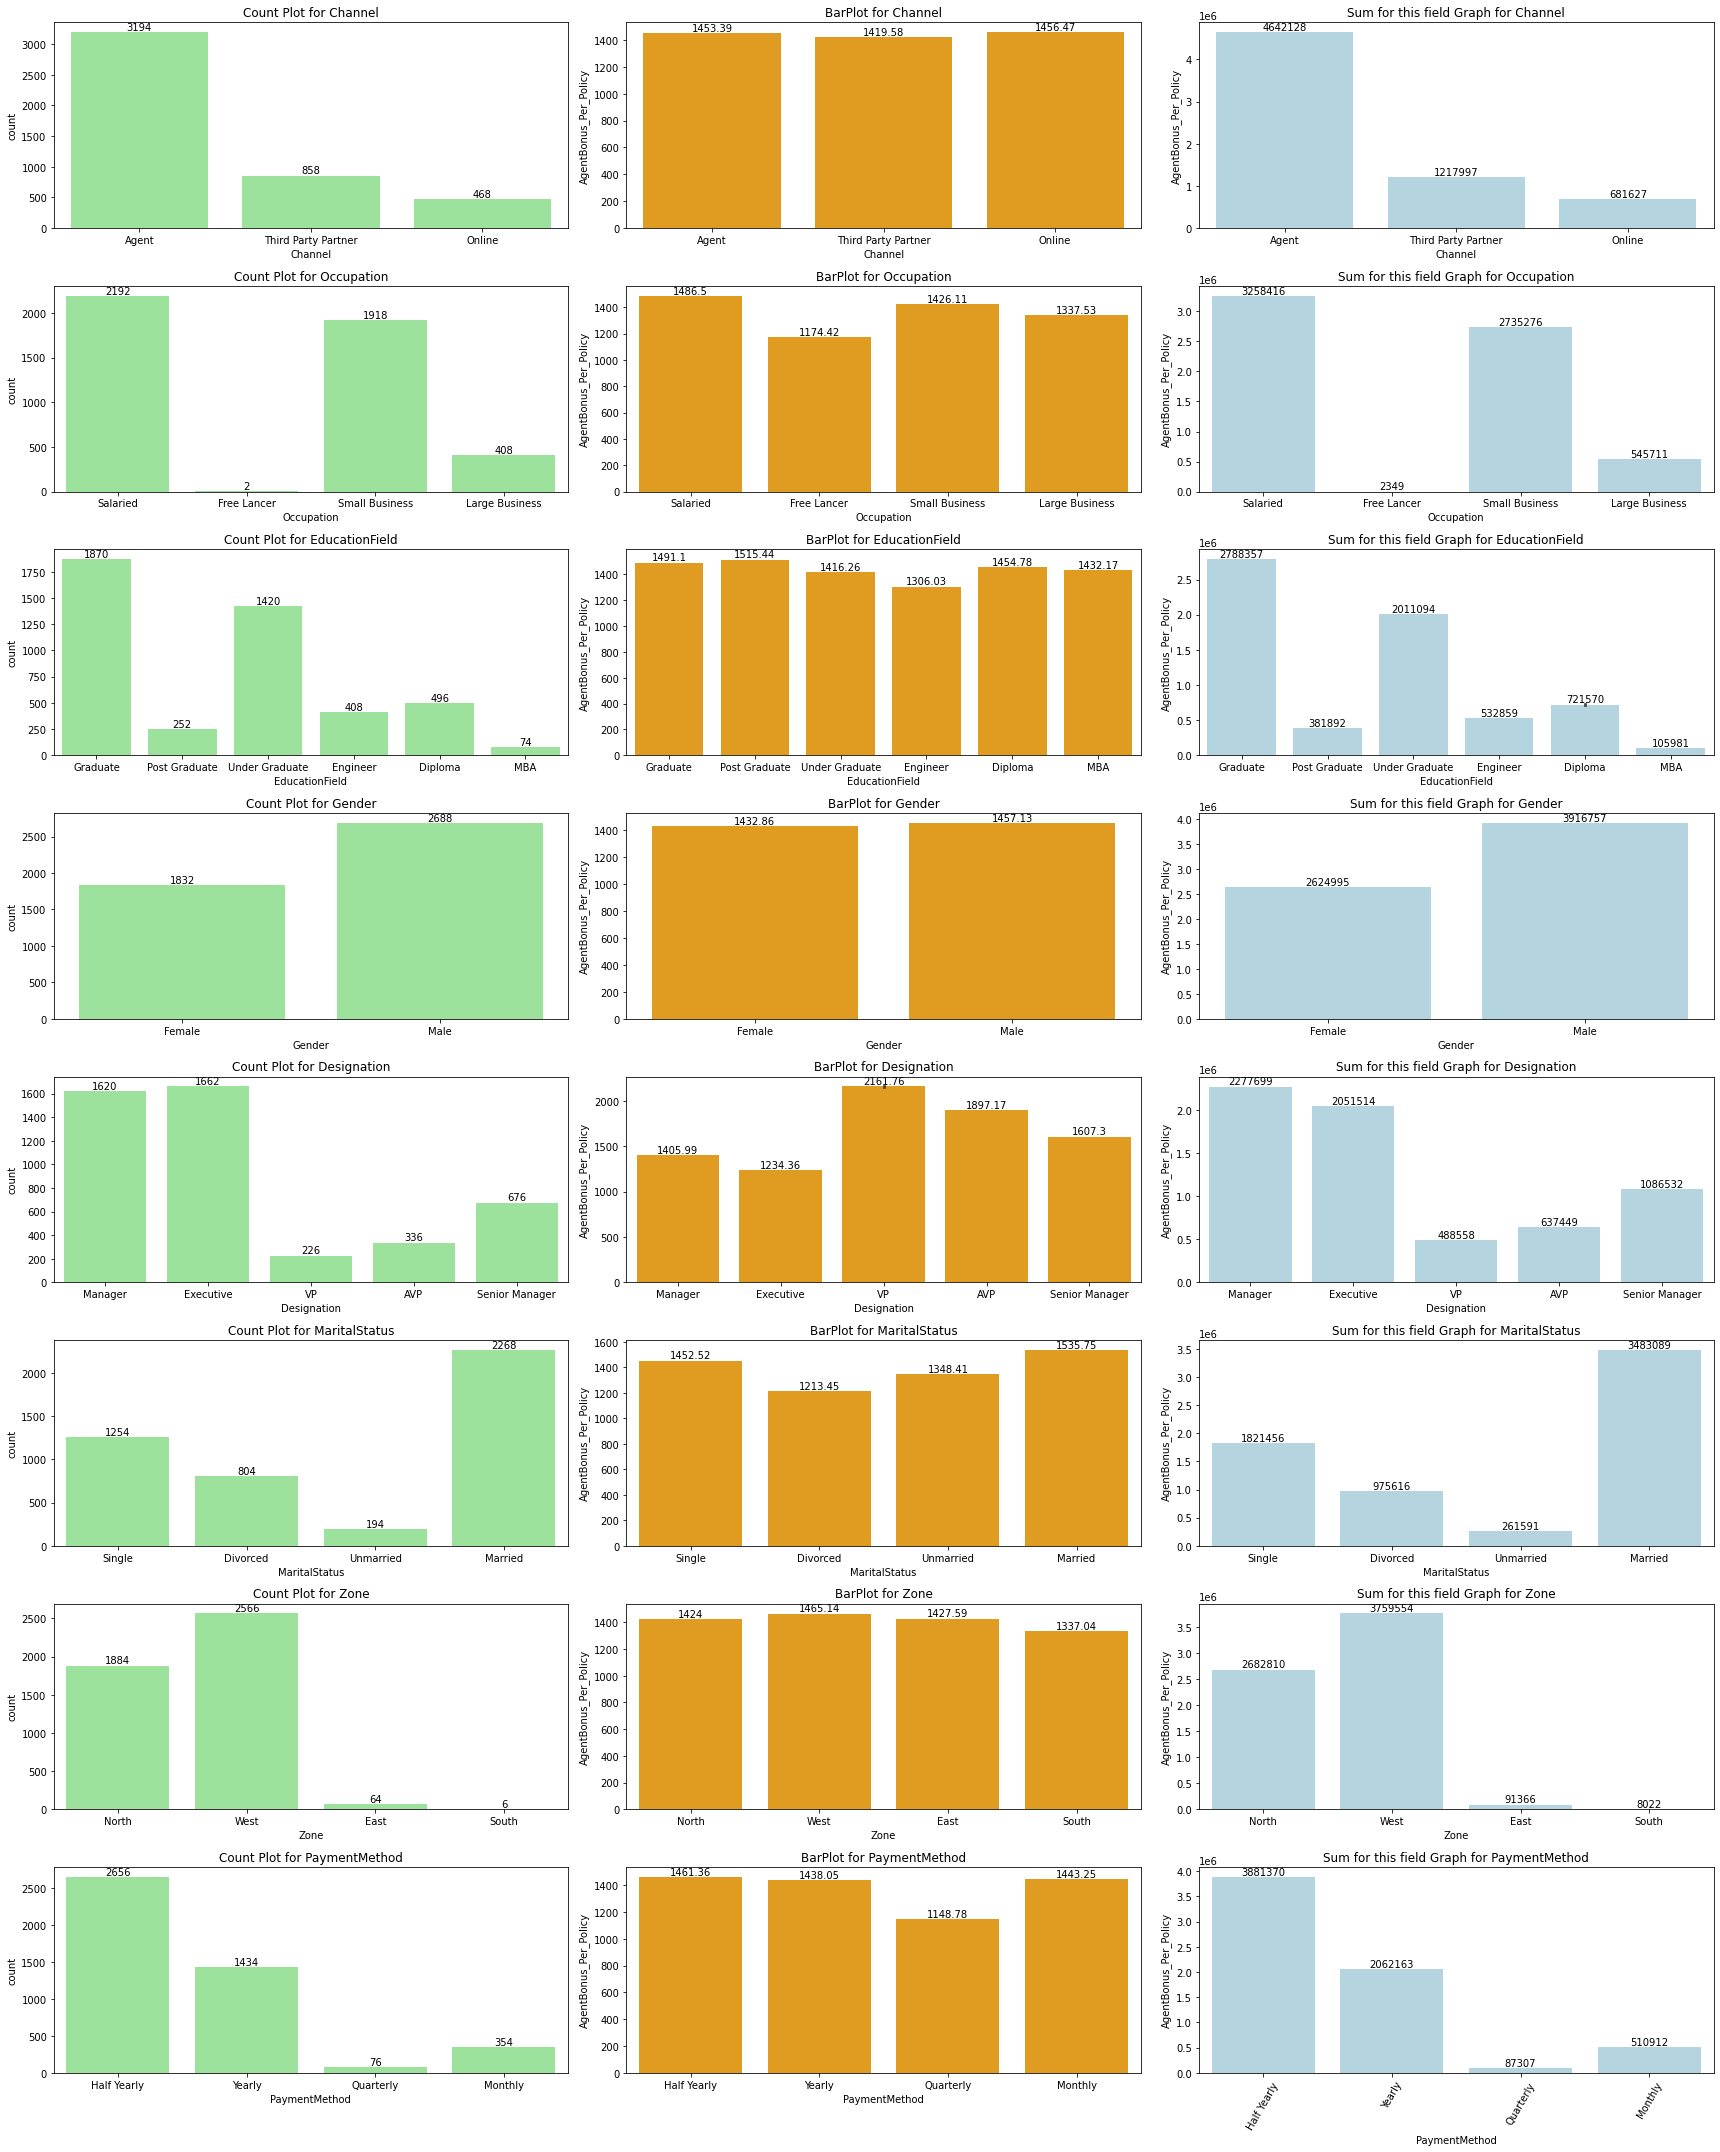

In [57]:
col_list=df2.columns
print(col_list)

fig, axes = plt.subplots(nrows=8,ncols=3)
fig.set_size_inches(24,30)
x=0
y=0
for i in df2.select_dtypes(include='object'):
        ax_count=sns.countplot(data=df2, ax=axes[x][y], x=i, color='lightgreen', orient='v' ) ##color='g'
        ax_count.set(xlabel=i,title='Count Plot for '+i)
        plt.xticks(rotation=60)
        for container in ax_count.containers:
            ax_count.bar_label(container)
        ax_bar=sns.barplot(data = df2, x=i, y='AgentBonus_Per_Policy', ax=axes[x][y+1] , color='orange', ci=0.1, orient='v')
        ax_bar.set(xlabel=i,title='BarPlot for '+i)
        plt.xticks(rotation=60)
        for container in ax_bar.containers:
            ax_bar.bar_label(container)
        ax_sum_var=sns.barplot(data = df2, x=i, y='AgentBonus_Per_Policy', ax=axes[x][y+2] , estimator=sum, color='lightblue', ci=0.1, orient='v')
        ax_sum_var.set(xlabel=i,title='Sum for this field Graph for '+i)
        plt.xticks(rotation=60)
        for container in ax_sum_var.containers:
            #ax_sum_var.bar_label(container)
            ax_sum_var.bar_label(ax_sum_var.containers[0], fmt='%.0f')
        plt.tight_layout()
        x=x+1

#### We have ploted Counts, Mean and Sum for Agent Bonus against each categorical field of sample data

## Multivariate Analysis

<Figure size 720x720 with 0 Axes>

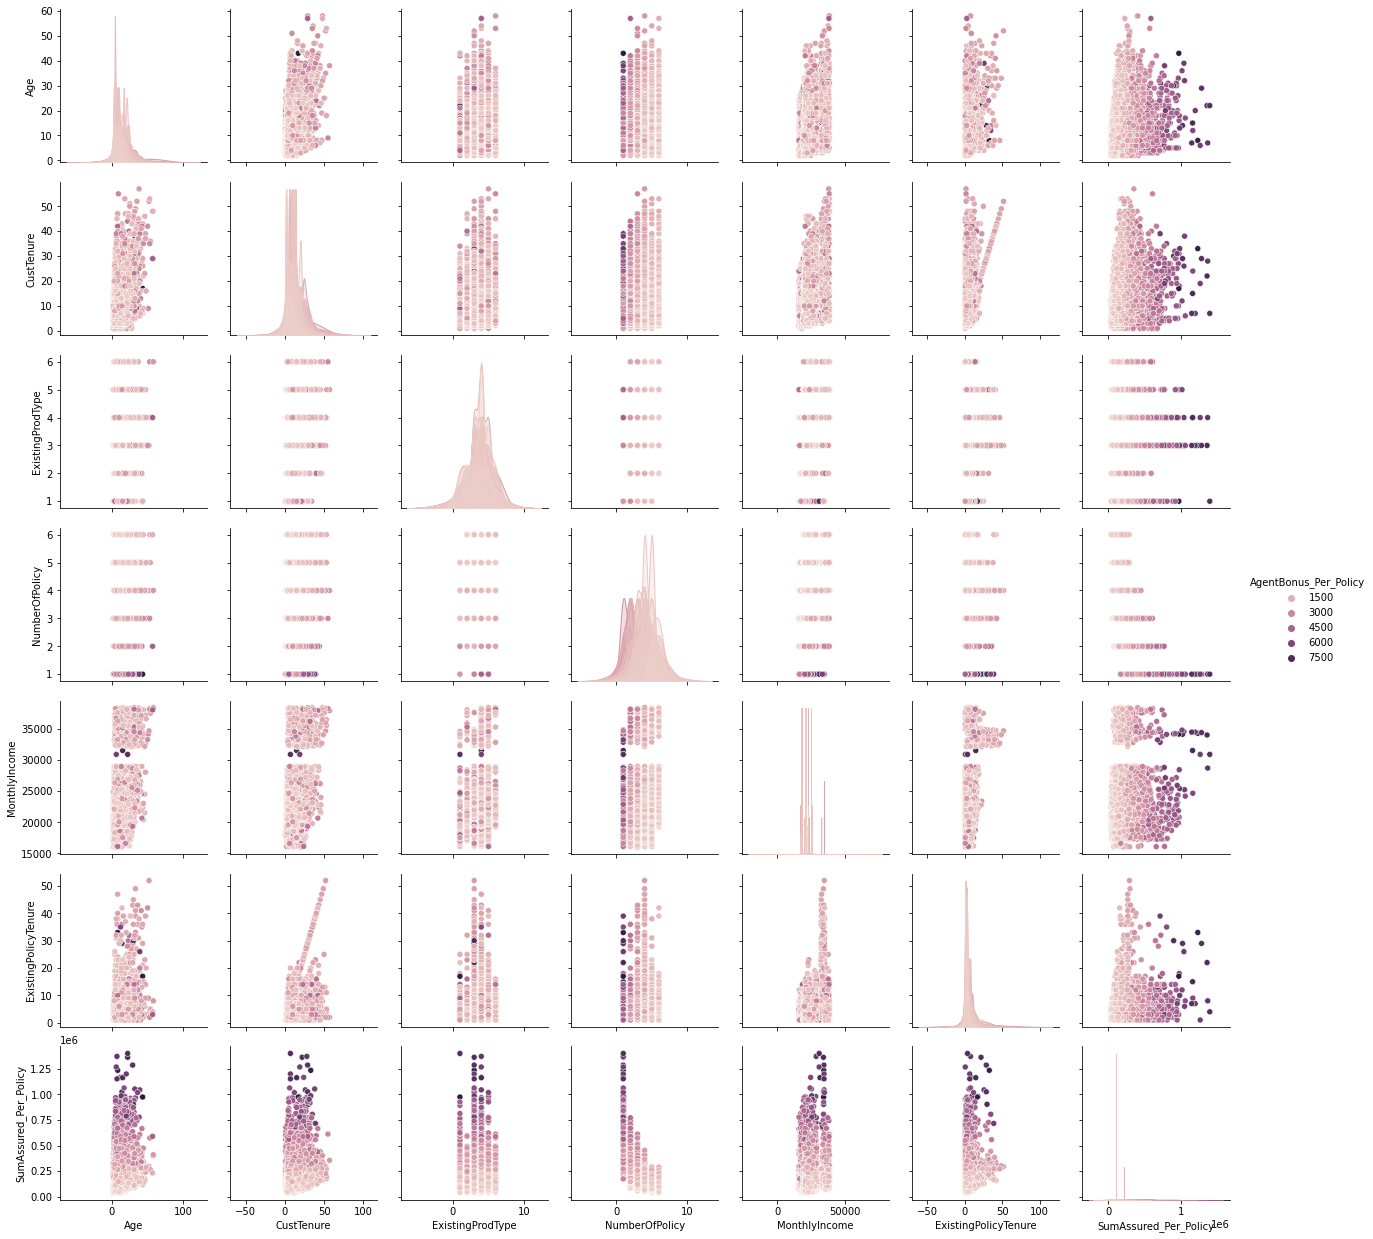

In [58]:
plt.figure(figsize=(10,10))
## sns.pairplot(data=df2, diag_kind='kde',hue = 'AgentBonus');
sns.pairplot(data=df2.select_dtypes(include='number'),  hue="AgentBonus_Per_Policy")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'CustTenure'),
  Text(2.5, 0, 'ExistingProdType'),
  Text(3.5, 0, 'NumberOfPolicy'),
  Text(4.5, 0, 'MonthlyIncome'),
  Text(5.5, 0, 'ExistingPolicyTenure'),
  Text(6.5, 0, 'AgentBonus_Per_Policy'),
  Text(7.5, 0, 'SumAssured_Per_Policy')])

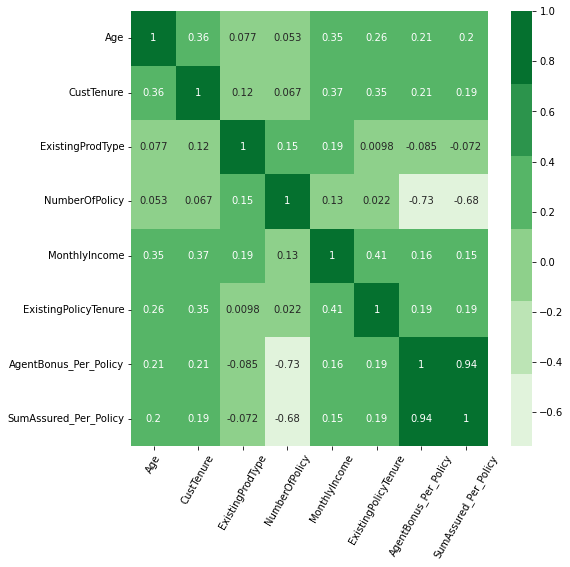

In [112]:
## Heat Map for all Numeric Fields
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Greens")
sns.heatmap(df2.corr(),annot=True,cmap=colormap,);
plt.xticks(rotation=60)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'CustTenure'),
  Text(2.5, 0, 'ExistingProdType'),
  Text(3.5, 0, 'NumberOfPolicy'),
  Text(4.5, 0, 'MonthlyIncome'),
  Text(5.5, 0, 'ExistingPolicyTenure'),
  Text(6.5, 0, 'AgentBonus_Per_Policy'),
  Text(7.5, 0, 'SumAssured_Per_Policy')])

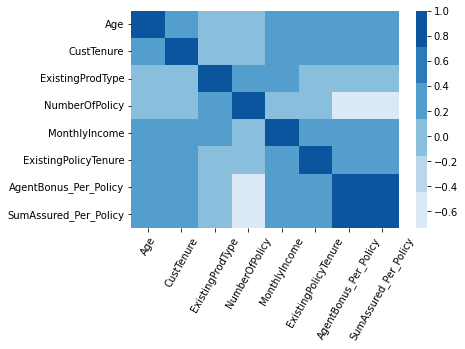

In [58]:
colormap = sns.color_palette("Blues")
sns.heatmap(df2.corr(), cmap=colormap)
plt.xticks(rotation=60)

In [60]:
df2.corr().T

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,AgentBonus_Per_Policy,SumAssured_Per_Policy
Age,1.000000,0.359631,0.076609,0.053143,0.347942,0.263640,0.211933,0.197145
CustTenure,0.359631,1.000000,0.115561,0.066859,0.368522,0.347473,0.207415,0.193545
ExistingProdType,0.076609,0.115561,1.000000,0.149862,0.191194,0.009800,-0.085003,-0.072151
NumberOfPolicy,0.053143,0.066859,0.149862,1.000000,0.128328,0.021839,-0.733911,-0.683045
MonthlyIncome,0.347942,0.368522,0.191194,0.128328,1.000000,0.410641,0.163630,0.154269
ExistingPolicyTenure,0.263640,0.347473,0.009800,0.021839,0.410641,1.000000,0.188274,0.185564
AgentBonus_Per_Policy,0.211933,0.207415,-0.085003,-0.733911,0.163630,0.188274,1.000000,0.937796
SumAssured_Per_Policy,0.197145,0.193545,-0.072151,-0.683045,0.154269,0.185564,0.937796,1.000000


In [61]:
df2.groupby("NumberOfPolicy").Age.count()

NumberOfPolicy
1.0     438
2.0     711
3.0     939
4.0    1139
5.0     856
6.0     437
Name: Age, dtype: int64

In [62]:
df2.to_csv('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\Capstone_Project\\LI_BFSI_01+-+Life+Insurance+Sales\\Sales_refined_data.csv')